# Data Analytics Exam

__Group participants:__ Artem Makoian, Nikita Ivlev, Veronika Sirotkina

## 1. Load and preprocess data

In [1]:
import pandas as pd

# Load datasets
airlines = pd.read_csv('Data/airlines.csv', delimiter=';', quotechar='"', na_values='NA').drop(columns='Unnamed: 0')
airports = pd.read_csv('Data/airports.csv', delimiter=';', quotechar='"', na_values='NA').drop(columns='Unnamed: 0')
flights = pd.read_csv('Data/flights.csv', delimiter=';', quotechar='"', na_values='NA').drop(columns='Unnamed: 0')
planes = pd.read_csv('Data/planes.csv', delimiter=';', quotechar='"', na_values='NA').drop(columns='Unnamed: 0')
weather = pd.read_csv('Data/weather.csv', delimiter=';', quotechar='"', na_values='NA').drop(columns='Unnamed: 0')

# Display basic information about the datasets
print("Airlines shape:", airlines.shape)
print("Airports shape:", airports.shape)
print("Flights shape:", flights.shape)
print("Planes shape:", planes.shape)
print("Weather shape:", weather.shape)

Airlines shape: (14, 2)
Airports shape: (1251, 8)
Flights shape: (435352, 19)
Planes shape: (4840, 9)
Weather shape: (26204, 15)


In [ ]:
def col_filna(col):
    return col.fillna(col[~col.isna()].astype(str).str.replace(',', '.').astype('float').mean())


def clean_airports(df):
    # Drop rows with missing data since there is little of them
    df['faa'] = df['faa'].astype(str)
    df['name'] = df['name'].astype(str)
    df['lat'] = df['lat'].astype(str).str.replace(',', '.').astype(float)
    df['lon'] = df['lon'].astype(str).str.replace(',', '.').astype(float)
    df['alt'] = df['alt'].astype(str).str.replace(',', '.').astype(float)
    df['tz'] = col_filna(df['tz']).astype(int)
    df['dst'] = df['dst'].astype(str)
    df['tzone'] = df['tzone'].astype(str)
    return df


def clean_flights(df):
    df['year'] = df['year'].astype(int)
    df['month'] = df['month'].astype(int)
    df['day'] = df['day'].astype(int)
    df['sched_dep_time'] = df['sched_dep_time'].astype(int)
    df['dep_delay'] = col_filna(df['dep_delay']).astype(int)
    df['air_time'] = col_filna(df['air_time']).astype(str).str.replace(',', '.').astype(float)
    df['sched_arr_time'] = df['sched_arr_time'].astype(int)
    df = df.dropna()
    df['arr_delay'] = df['arr_delay'].astype(int)

    # Data in dep_time and arr_time is corrupted due to not taking into account departing/arriving on the next day
    df['dep_time'] = df['sched_dep_time'] + df['dep_delay']
    df['arr_time'] = df['sched_arr_time'] + df['arr_delay']

    df['carrier'] = df['carrier'].astype(str)
    df['flight'] = df['flight'].astype(int)
    df['tailnum'] = df['tailnum'].astype(str)
    df['origin'] = df['origin'].astype(str)
    df['dest'] = df['dest'].astype(str)
    df['distance'] = df['distance'].astype(str).str.replace(',', '.').astype(float)
    df['hour'] = df['hour'].astype(int)
    df['minute'] = df['minute'].astype(int)
    df['time_hour'] = pd.to_datetime(df['time_hour'])
    return df


def clean_planes(df):
    df['tailnum'] = df['tailnum'].astype(str)
    df['year'] = col_filna(df['year']).astype(int)
    df['type'] = df['type'].astype(str)
    df['manufacturer'] = df['manufacturer'].astype(str)
    df['model'] = df['model'].astype(str)
    df['engines'] = df['engines'].astype(int)
    df['seats'] = df['seats'].astype(int)
    df['speed'] = df['speed'].astype(str).str.replace(',', '.').astype(float)
    df['engine'] = df['engine'].astype(str)
    return df


def clean_weather(df):
    # These columns are almost completely filled with NA.
    # The number of non-NA fields is too small to conclude anything, so we are dropping them
    df = df.drop(columns=['temp', 'dewp', 'humid', 'precip', 'pressure'])

    df['year'] = df['year'].astype(int)
    df['month'] = df['month'].astype(int)
    df['day'] = df['day'].astype(int)
    df['hour'] = df['hour'].astype(int)
    df['wind_dir'] = col_filna(df['wind_dir']).astype(int)
    df['wind_speed'] = col_filna(df['wind_speed']).astype(str).str.replace(',', '.').astype(float)
    df['wind_gust'] = col_filna(df['wind_gust']).astype(str).str.replace(',', '.').astype(float)
    df['visib'] = col_filna(df['visib']).astype(str).str.replace(',', '.').astype(float)
    df['time_hour'] = pd.to_datetime(df['time_hour'], errors='coerce')
    df = df.dropna()
    return df

In [31]:
airports_cleaned = clean_airports(airports)
flights_cleaned = clean_flights(flights)
planes_cleaned = clean_planes(planes)
weather_cleaned = clean_weather(weather)

/var/folders/vy/v3mdfnp92334mtsy37n_rf9r0000gn/T/ipykernel_35036/1994890764.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['arr_delay'] = df['arr_delay'].astype(int)
/var/folders/vy/v3mdfnp92334mtsy37n_rf9r0000gn/T/ipykernel_35036/1994890764.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['dep_time'] = df['sched_dep_time'] + df['dep_delay']
/var/folders/vy/v3mdfnp92334mtsy37n_rf9r0000gn/T/ipykernel_35036/1994890764.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a s

In [15]:
print(airports_cleaned.isna().info())
print(flights_cleaned.isna().info())
print(planes_cleaned.isna().info())
print(weather_cleaned.isna().info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1251 entries, 0 to 1250
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   faa     1251 non-null   bool 
 1   name    1251 non-null   bool 
 2   lat     1251 non-null   bool 
 3   lon     1251 non-null   bool 
 4   alt     1251 non-null   bool 
 5   tz      1251 non-null   bool 
 6   dst     1251 non-null   bool 
 7   tzone   1251 non-null   bool 
dtypes: bool(8)
memory usage: 9.9 KB
None
<class 'pandas.core.frame.DataFrame'>
Index: 422818 entries, 0 to 435351
Data columns (total 19 columns):
 #   Column          Non-Null Count   Dtype
---  ------          --------------   -----
 0   year            422818 non-null  bool 
 1   month           422818 non-null  bool 
 2   day             422818 non-null  bool 
 3   dep_time        422818 non-null  bool 
 4   sched_dep_time  422818 non-null  bool 
 5   dep_delay       422818 non-null  bool 
 6   arr_time        422818 non-null  bool 


## 2. Explore table data

Summary for Airports:
         faa                  name          lat          lon          alt  \
count   1251                  1251  1251.000000  1251.000000  1251.000000   
unique  1251                  1248          NaN          NaN          NaN   
top      AAF  Capital City Airport          NaN          NaN          NaN   
freq       1                     3          NaN          NaN          NaN   
mean     NaN                   NaN    40.933284  -103.465931  1121.992006   
std      NaN                   NaN    10.193500    28.112110  1602.521826   
min      NaN                   NaN    19.721399  -176.645996  -115.000000   
25%      NaN                   NaN    34.103500  -117.876000    96.000000   
50%      NaN                   NaN    39.345100   -95.912498   551.000000   
75%      NaN                   NaN    44.316700   -83.286251  1226.000000   
max      NaN                   NaN    71.285402   174.113998  9070.000000   

                 tz   dst             tzone  
count  

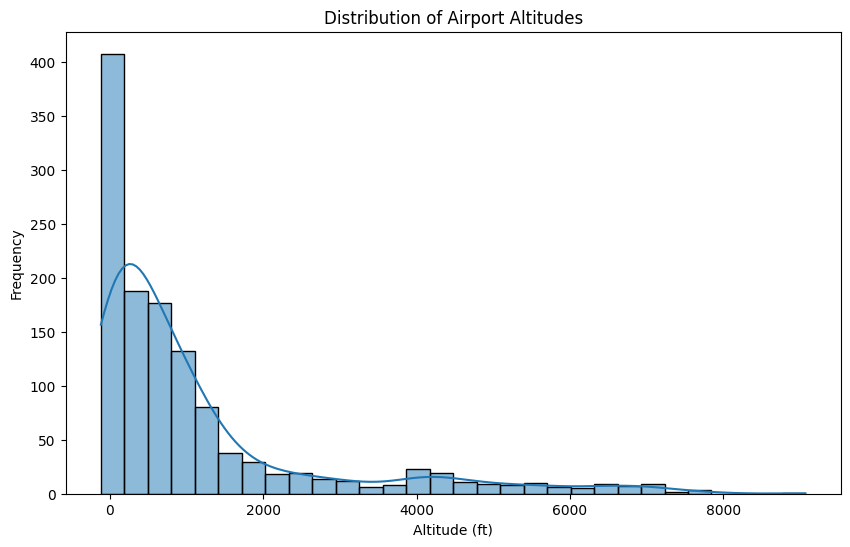

Summary for Flights:
            year          month            day       dep_time  sched_dep_time  \
count   422818.0  422818.000000  422818.000000  422818.000000   422818.000000   
unique       NaN            NaN            NaN            NaN             NaN   
top          NaN            NaN            NaN            NaN             NaN   
freq         NaN            NaN            NaN            NaN             NaN   
mean      2023.0       6.428752      15.703208    1371.699587     1358.000381   
min       2023.0       1.000000       1.000000     487.000000      500.000000   
25%       2023.0       3.000000       8.000000     934.000000      930.000000   
50%       2023.0       6.000000      16.000000    1379.000000     1355.000000   
75%       2023.0       9.000000      23.000000    1792.000000     1755.000000   
max       2023.0      12.000000      31.000000    3387.000000     2359.000000   
std          0.0       3.439978       8.765872     487.301494      477.343077   

      

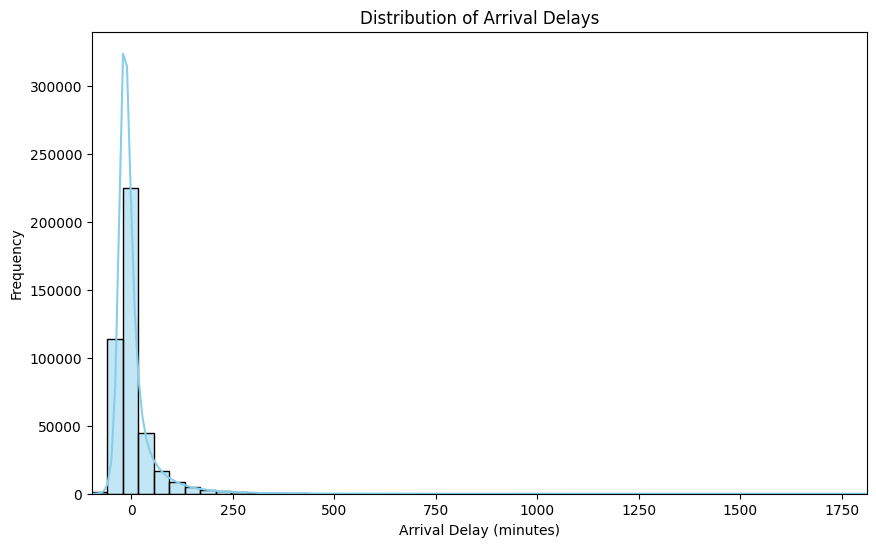

/var/folders/vy/v3mdfnp92334mtsy37n_rf9r0000gn/T/ipykernel_35036/3631951902.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=flights_cleaned, x='month', y='arr_delay', palette='coolwarm')


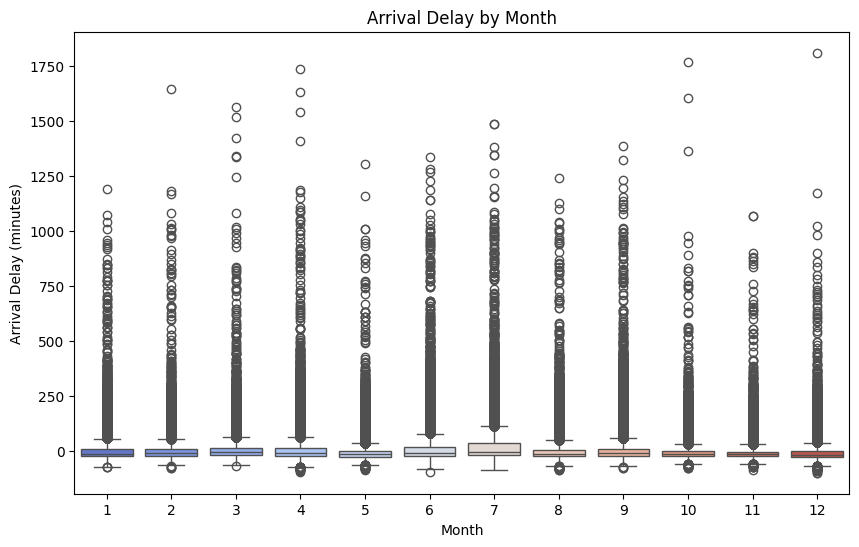

Summary for Planes:
       tailnum         year                     type manufacturer  model  \
count     4840  4840.000000                     4840         4840   4840   
unique    4840          NaN                        3           12     92   
top     N101DQ          NaN  Fixed wing multi engine       BOEING  737-8   
freq         1          NaN                     4838         2604    346   
mean       NaN  2010.155165                      NaN          NaN    NaN   
std        NaN     8.293347                      NaN          NaN    NaN   
min        NaN  1990.000000                      NaN          NaN    NaN   
25%        NaN  2002.000000                      NaN          NaN    NaN   
50%        NaN  2011.000000                      NaN          NaN    NaN   
75%        NaN  2017.000000                      NaN          NaN    NaN   
max        NaN  2023.000000                      NaN          NaN    NaN   

            engines        seats   speed     engine  
count   4840.

/var/folders/vy/v3mdfnp92334mtsy37n_rf9r0000gn/T/ipykernel_35036/3631951902.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=planes_cleaned, x='year', palette='viridis')


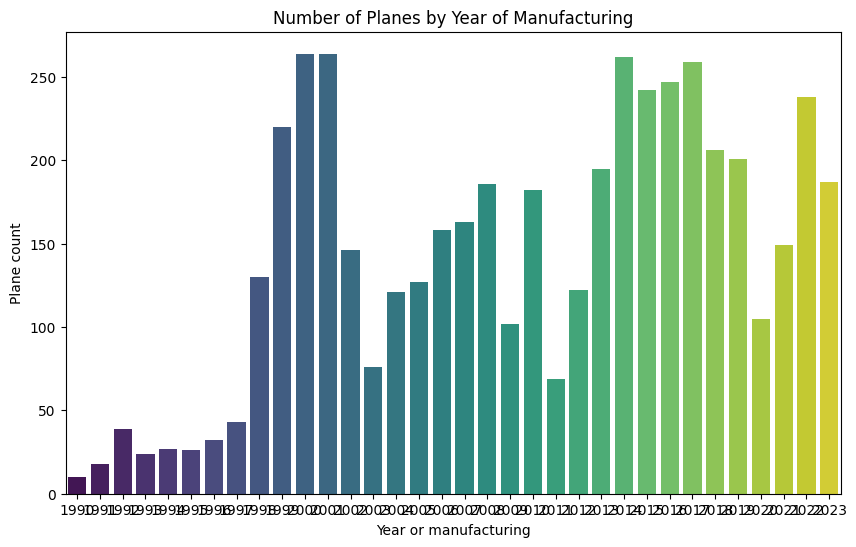

Summary for Weather:
       origin     year         month           day          hour  \
count   25112  25112.0  25112.000000  25112.000000  25112.000000   
unique      3      NaN           NaN           NaN           NaN   
top       JFK      NaN           NaN           NaN           NaN   
freq     8371      NaN           NaN           NaN           NaN   
mean      NaN   2023.0      6.511469     15.679556     11.346687   
min       NaN   2023.0      1.000000      1.000000      0.000000   
25%       NaN   2023.0      4.000000      8.000000      5.000000   
50%       NaN   2023.0      7.000000     16.000000     11.000000   
75%       NaN   2023.0     10.000000     23.000000     18.000000   
max       NaN   2023.0     12.000000     31.000000     23.000000   
std       NaN      0.0      3.440724      8.772094      7.030021   

            wind_dir    wind_speed     wind_gust         visib  \
count   25112.000000  25112.000000  25112.000000  25112.000000   
unique           NaN          

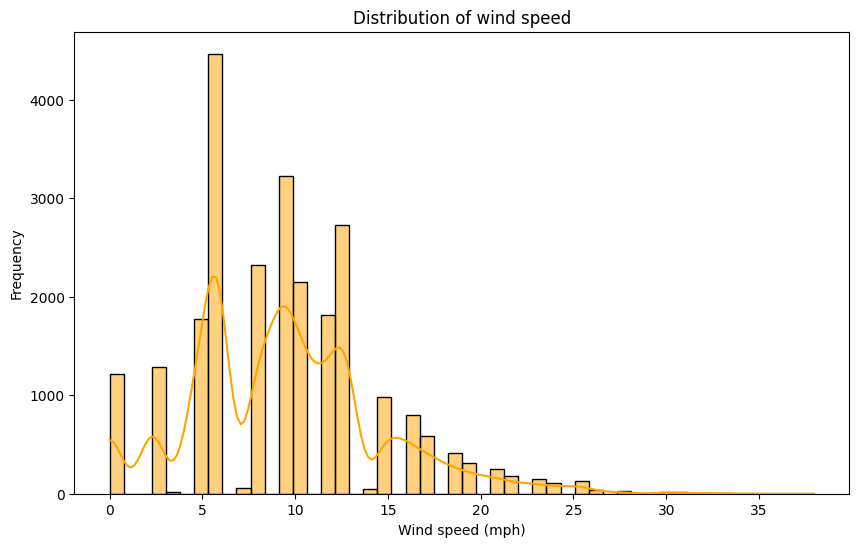

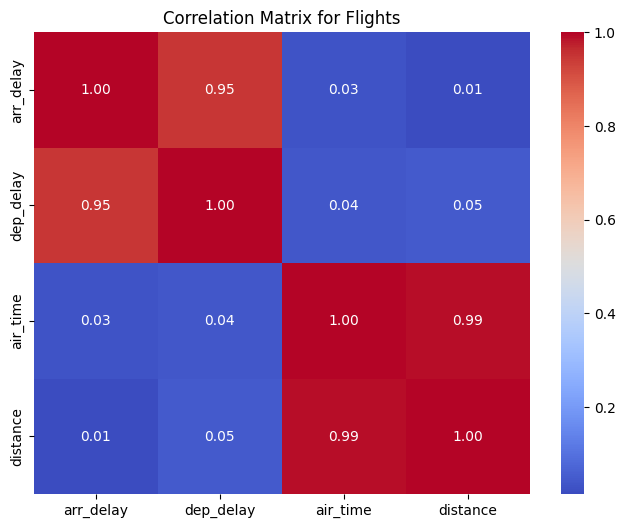

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns


def dataset_summary(df, name):
    print(f"Summary for {name}:")
    print(df.describe(include='all'))
    print(f"\nMissing values in {name}:\n{df.isnull().sum()}\n")
    print("-" * 50)


# Airports dataset
dataset_summary(airports_cleaned, "Airports")
plt.figure(figsize=(10, 6))
sns.histplot(airports_cleaned['alt'], kde=True, bins=30)
plt.title("Distribution of Airport Altitudes")
plt.xlabel("Altitude (ft)")
plt.ylabel("Frequency")
plt.show()

# Flights dataset
dataset_summary(flights_cleaned, "Flights")
plt.figure(figsize=(10, 6))
sns.histplot(flights_cleaned['arr_delay'], kde=True, bins=50, color='skyblue')
plt.title("Distribution of Arrival Delays")
plt.xlabel("Arrival Delay (minutes)")
plt.ylabel("Frequency")
plt.xlim(flights_cleaned['arr_delay'].min(), flights_cleaned['arr_delay'].max())
plt.show()

# Explore flights delay trends by month
plt.figure(figsize=(10, 6))
sns.boxplot(data=flights_cleaned, x='month', y='arr_delay', palette='coolwarm')
plt.title("Arrival Delay by Month")
plt.xlabel("Month")
plt.ylabel("Arrival Delay (minutes)")
plt.show()

# Planes dataset
dataset_summary(planes_cleaned, "Planes")
plt.figure(figsize=(10, 6))
sns.countplot(data=planes_cleaned, x='year', palette='viridis')
plt.title("Number of Planes by Year of Manufacturing")
plt.xlabel("Year or manufacturing")
plt.ylabel("Plane count")
plt.show()

# Weather dataset
dataset_summary(weather_cleaned, "Weather")
plt.figure(figsize=(10, 6))
sns.histplot(weather_cleaned['wind_speed'], kde=True, bins=50, color='orange')
plt.title("Distribution of wind speed")
plt.xlabel("Wind speed (mph)")
plt.ylabel("Frequency")
plt.show()

# Correlation between distance and delays for Flights
corr = flights_cleaned[['arr_delay', 'dep_delay', 'air_time', 'distance']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix for Flights")
plt.show()

## 3 Training

### Example


#### Preprocess data to predict month of the year by weather

In [34]:
# Features and target
X = weather_cleaned[['wind_dir', 'wind_speed', 'wind_gust', 'visib']]
y = weather_cleaned['month']

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize numerical values
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#### Train model

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Logistic Regression
logistic_model = LogisticRegression(multi_class='multinomial', max_iter=1000, random_state=42)
logistic_model.fit(X_train_scaled, y_train)
y_pred_logistic = logistic_model.predict(X_test_scaled)

print("Logistic Regression Results:")
print(classification_report(y_test, y_pred_logistic))
print("Accuracy:", accuracy_score(y_test, y_pred_logistic))

# Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, y_train)
y_pred_rf = rf_model.predict(X_test_scaled)

print("\nRandom Forest Results:")
print(classification_report(y_test, y_pred_rf))
print("Accuracy:", accuracy_score(y_test, y_pred_rf))

/Users/makartkar/work/cub/data_analytics/DataAnalyticsProject/.venv/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/Users/makartkar/work/cub/data_analytics/DataAnalyticsProject/.venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/makartkar/work/cub/data_analytics/DataAnalyticsProject/.venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to contro

Logistic Regression Results:
              precision    recall  f1-score   support

           1       0.08      0.03      0.05       429
           2       0.00      0.00      0.00       379
           3       0.16      0.39      0.23       406
           4       0.21      0.08      0.11       444
           5       0.00      0.00      0.00       439
           6       0.29      0.00      0.01       458
           7       0.12      0.26      0.16       415
           8       0.12      0.30      0.17       422
           9       0.14      0.20      0.17       396
          10       0.00      0.00      0.00       421
          11       0.10      0.25      0.15       363
          12       0.19      0.14      0.16       451

    accuracy                           0.13      5023
   macro avg       0.12      0.14      0.10      5023
weighted avg       0.12      0.13      0.10      5023

Accuracy: 0.133983675094565

Random Forest Results:
              precision    recall  f1-score   suppor

### Training

In [85]:
data = flights_cleaned.\
    merge(airports_cleaned.rename(columns={'faa': 'origin'}), on='origin', suffixes=('', '_origin')).\
    merge(airports_cleaned.rename(columns={'faa': 'dest'}), on='dest', suffixes=('', '_dest')).\
    merge(planes_cleaned, on='tailnum', suffixes=('', '_plane')).\
    merge(weather_cleaned, on=['time_hour', 'year', 'month', 'day'], suffixes=('', '_weather'))
data

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,...,engines,seats,speed,engine,origin_weather,hour_weather,wind_dir,wind_speed,wind_gust,visib
0,2023,1,1,2241,2038,203,208,3,205,UA,...,2,149,0.0,Turbo-fan,JFK,11,260,11.507800,13.242946,6.0
1,2023,1,1,2241,2038,203,208,3,205,UA,...,2,149,0.0,Turbo-fan,LGA,11,240,9.206240,10.594357,10.0
2,2023,1,1,2241,2038,203,208,3,205,UA,...,2,149,0.0,Turbo-fan,EWR,11,220,10.357020,11.918651,7.0
3,2023,1,1,2378,2300,78,188,135,53,DL,...,2,222,0.0,Turbo-fan,JFK,14,230,8.055460,9.270062,10.0
4,2023,1,1,2378,2300,78,188,135,53,DL,...,2,222,0.0,Turbo-fan,LGA,14,300,12.658580,14.567241,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
965300,2023,12,30,2310,2220,90,208,153,55,B6,...,2,379,0.0,Turbo-fan,LGA,13,250,12.658580,14.567241,10.0
965301,2023,12,30,2310,2220,90,208,153,55,B6,...,2,379,0.0,Turbo-fan,EWR,13,188,9.439861,10.863204,10.0
965302,2023,12,30,2314,2206,108,2424,2332,92,UA,...,2,191,0.0,Turbo-fan,JFK,13,270,14.960140,17.215830,10.0
965303,2023,12,30,2314,2206,108,2424,2332,92,UA,...,2,191,0.0,Turbo-fan,LGA,13,250,12.658580,14.567241,10.0


In [115]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 965305 entries, 133 to 963312
Data columns (total 47 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   year            965305 non-null  int64         
 1   month           965305 non-null  int64         
 2   day             965305 non-null  int64         
 3   dep_time        965305 non-null  int64         
 4   sched_dep_time  965305 non-null  int64         
 5   dep_delay       965305 non-null  int64         
 6   arr_time        965305 non-null  int64         
 7   sched_arr_time  965305 non-null  int64         
 8   arr_delay       965305 non-null  int64         
 9   carrier         965305 non-null  object        
 10  flight          965305 non-null  int64         
 11  tailnum         965305 non-null  object        
 12  origin          965305 non-null  object        
 13  dest            965305 non-null  object        
 14  air_time        965305 non-null  float6

In [86]:
data = data.sort_values(by='time_hour')
data['time_hour']

133      2023-01-01 09:00:00
126      2023-01-01 09:00:00
127      2023-01-01 09:00:00
128      2023-01-01 09:00:00
129      2023-01-01 09:00:00
                 ...        
965272   2023-12-30 22:00:00
965304   2023-12-30 22:00:00
963311   2023-12-30 23:00:00
963310   2023-12-30 23:00:00
963312   2023-12-30 23:00:00
Name: time_hour, Length: 965305, dtype: datetime64[ns]

In [87]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Define preprocessors
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

# Identify categorical and numerical features
categorical_features = [
    'carrier', 'origin', 'dest', 'name', 'name_dest', 'tzone_dest', 'type', 'manufacturer', 'model', 'engine',
]
numerical_features = [
    'year', 'month', 'day', 'sched_dep_time', 'sched_arr_time', 'distance',
    'hour', 'minute', 'lat', 'lon', 'alt', 'tz',
    'lat_dest', 'lon_dest', 'alt_dest', 'tz_dest', 'year_plane',
    'engines', 'seats', 'speed', 'hour_weather',
    'wind_dir', 'wind_speed', 'wind_gust', 'visib'
]

# Combine transformers in a column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

#### Classification

We will classify if the plane arrived on time or not. The idea to predict this before the plane departure, so, we will also drop `'dep_delay', 'arr_delay', 'arr_time', 'dep_time', 'air_time'` features that can be observed only after the flight will be started.

In [104]:
df = data.copy()

# Derive a categorical target variable
df['on_time'] = df['arr_delay'].apply(lambda x: 'on_time' if x <= 0 else 'delayed')

# Features and the new categorical target variable
X = df.drop(columns=['on_time', 'dep_delay', 'arr_delay', 'arr_time', 'dep_time', 'air_time'])
y = df[['on_time']]
X.columns

Index(['year', 'month', 'day', 'sched_dep_time', 'sched_arr_time', 'carrier',
       'flight', 'tailnum', 'origin', 'dest', 'distance', 'hour', 'minute',
       'time_hour', 'name', 'lat', 'lon', 'alt', 'tz', 'dst', 'tzone',
       'name_dest', 'lat_dest', 'lon_dest', 'alt_dest', 'tz_dest', 'dst_dest',
       'tzone_dest', 'year_plane', 'type', 'manufacturer', 'model', 'engines',
       'seats', 'speed', 'engine', 'origin_weather', 'hour_weather',
       'wind_dir', 'wind_speed', 'wind_gust', 'visib'],
      dtype='object')

In [105]:
# Split data into training and testing sets
train_size = int(0.8 * len(X))
X_train, X_test, y_train, y_test = X[:train_size], X[train_size:], (y == 'delayed').astype(int)[:train_size], (y == 'delayed').astype(int)[train_size:]

In [106]:
from sklearn.linear_model import LogisticRegression

preprocessing_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000, n_jobs=16)),
])
preprocessing_pipeline.fit(X_train, y_train)
preprocessing_pipeline.score(X_test, y_test)

/Users/makartkar/work/cub/data_analytics/DataAnalyticsProject/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7063415190017662

In [ ]:
from sklearn.svm import LinearSVC

preprocessing_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LinearSVC()),
])
preprocessing_pipeline.fit(X_train, y_train)
preprocessing_pipeline.score(X_test, y_test)

/Users/makartkar/work/cub/data_analytics/DataAnalyticsProject/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7074499769502903

In [ ]:
from sklearn.naive_bayes import GaussianNB

preprocessing_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', GaussianNB()),
])
preprocessing_pipeline.fit(X_train, y_train)
preprocessing_pipeline.score(X_test, y_test)

/Users/makartkar/work/cub/data_analytics/DataAnalyticsProject/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7392378574647391

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

preprocessing_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', ExtraTreesClassifier()),
])
preprocessing_pipeline.fit(X_train, y_train)
preprocessing_pipeline.score(X_test, y_test)

/Users/makartkar/work/cub/data_analytics/DataAnalyticsProject/.venv/lib/python3.13/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


0.6988361191540498

In [ ]:
from sklearn.ensemble import HistGradientBoostingClassifier

preprocessing_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', HistGradientBoostingClassifier(max_iter=1000)),
])
preprocessing_pipeline.fit(X_train, y_train)
preprocessing_pipeline.score(X_test, y_test)

/Users/makartkar/work/cub/data_analytics/DataAnalyticsProject/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7317272779069828

In [ ]:
from sklearn.neural_network import MLPClassifier

preprocessing_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', MLPClassifier()),
])
preprocessing_pipeline.fit(X_train, y_train)
preprocessing_pipeline.score(X_test, y_test)

/Users/makartkar/work/cub/data_analytics/DataAnalyticsProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1119: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7444227472146109

#### Results

| Model  | Accuracy  |
|---|---|
| LogisticRegression  | 0.71  |
| LinearSVC  | 0.71  |
| GaussianNB  | 0.739  |
| ExtraTreesClassifier  | 0.70  |
| HistGradientBoostingClassifier  | 0.73  |
| MLPClassifier  | 0.744  |

#### Regression

For regression task we chose the duration of delay. We will drop the same features as for classification task.

In [107]:
df = data.copy()

# Features and the new categorical target variable
X = df.drop(columns=['dep_delay', 'arr_delay', 'arr_time', 'dep_time', 'air_time'])
y = df[['arr_delay']]
X.columns

Index(['year', 'month', 'day', 'sched_dep_time', 'sched_arr_time', 'carrier',
       'flight', 'tailnum', 'origin', 'dest', 'distance', 'hour', 'minute',
       'time_hour', 'name', 'lat', 'lon', 'alt', 'tz', 'dst', 'tzone',
       'name_dest', 'lat_dest', 'lon_dest', 'alt_dest', 'tz_dest', 'dst_dest',
       'tzone_dest', 'year_plane', 'type', 'manufacturer', 'model', 'engines',
       'seats', 'speed', 'engine', 'origin_weather', 'hour_weather',
       'wind_dir', 'wind_speed', 'wind_gust', 'visib'],
      dtype='object')

In [108]:
# Split data into training and testing sets
train_size = int(0.8 * len(X))
X_train, X_test, y_train, y_test = X[:train_size], X[train_size:], y[:train_size], y[train_size:]

In [109]:
import numpy as np

from sklearn.linear_model import LinearRegression

preprocessing_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LinearRegression(n_jobs=16)),
])
preprocessing_pipeline.fit(X_train, y_train)
preds = preprocessing_pipeline.predict(X_test)
np.mean(np.abs(y_test.values - preds))

np.float64(32.59838678430545)

In [110]:
from sklearn.svm import LinearSVR

preprocessing_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LinearSVR()),
])
preprocessing_pipeline.fit(X_train, y_train)
preds = preprocessing_pipeline.predict(X_test)
np.mean(np.abs(y_test.values[:, 0] - preds))

/Users/makartkar/work/cub/data_analytics/DataAnalyticsProject/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


np.float64(21.284355470955056)

In [111]:
from sklearn.linear_model import BayesianRidge

preprocessing_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', BayesianRidge()),
])
preprocessing_pipeline.fit(X_train, y_train)
preds = preprocessing_pipeline.predict(X_test)
np.mean(np.abs(y_test.values[:, 0] - preds))

/Users/makartkar/work/cub/data_analytics/DataAnalyticsProject/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


np.float64(32.60500988382168)

In [112]:
# from sklearn.ensemble import RandomForestRegressor

# preprocessing_pipeline = Pipeline(steps=[
#     ('preprocessor', preprocessor),
#     ('classifier', RandomForestRegressor(verbose=True)),
# ])
# preprocessing_pipeline.fit(X_train, y_train)
# preds = preprocessing_pipeline.predict(X_test)
# np.mean(np.abs(y_test.values[:, 0] - preds))

In [113]:
from sklearn.ensemble import HistGradientBoostingRegressor

preprocessing_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', HistGradientBoostingRegressor(max_iter=1000)),
])
preprocessing_pipeline.fit(X_train, y_train)
preds = preprocessing_pipeline.predict(X_test)
np.mean(np.abs(y_test.values[:, 0] - preds))

/Users/makartkar/work/cub/data_analytics/DataAnalyticsProject/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


np.float64(25.850007783094618)

In [114]:
from sklearn.neural_network import MLPRegressor

preprocessing_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', MLPRegressor()),
])
preprocessing_pipeline.fit(X_train, y_train)
preds = preprocessing_pipeline.predict(X_test)
np.mean(np.abs(y_test.values[:, 0] - preds))

/Users/makartkar/work/cub/data_analytics/DataAnalyticsProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1645: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/makartkar/work/cub/data_analytics/DataAnalyticsProject/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


np.float64(37.32654896577927)

#### Results

| Model  | MAE  |
|---|---|
| LinearRegression  | 32.60  |
| LinearSVR  | 21.28  |
| BayesianRidge  | 32.60  |
| RandomForestRegressor  | training is too long  |
| HistGradientBoostingRegressor  | 25.85  |
| MLPRegressor  | 37.33  |